In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime

In [61]:
'''
Part 1: UFO
'''
ufo = pd.read_csv('../data/ufo.csv')   # can also read csvs directly from the web!



# 1. change the column names so that each name has no spaces
#           and all lower case

# 2. Show a bar chart of all shapes reported

# 3. Show a dataframe that only displays the reportings from Utah

# 4. Show a dataframe that only displays the reportings from Texas

# 5. Show a dataframe that only displays the reportings from Utah OR Texas

# 6. Which shape is reported most often?

# 7. Plot number of sightings per day in 2014 (days should be in order!)

In [62]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [63]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [64]:
# 1. change the column names so that each name has no spaces
#           and all lower case

ufo.columns = ["city", "colors_reported", "shape_reported", "state", "time"]
ufo.columns

Index([u'city', u'colors_reported', u'shape_reported', u'state', u'time'], dtype='object')

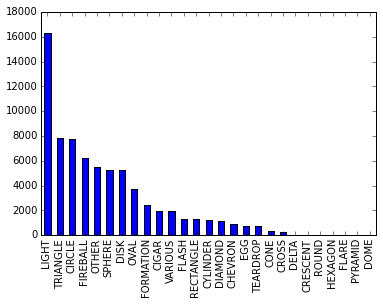

In [65]:
# 2. Show a bar chart of all shapes reported
ufo.shape_reported.value_counts().plot(kind="bar")

In [66]:
# 3. Show a dataframe that only displays the reportings from Utah
ufo[ufo.state == "UT"].head()

,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
164,Provo,BLUE,DISK,UT,7/10/1951 23:30
170,Salt Lake City,NaN,NaN,UT,1/1/1952 0:00
356,Salt Lake City,NaN,CIRCLE,UT,6/5/1956 0:00
433,Salt Lake City,NaN,DISK,UT,7/15/1957 22:00


In [26]:
# 4. Show a dataframe that only displays the reportings from Texas
ufo[ufo.state == "TX"].head()

,city,colors_reported,shape_reported,state,time
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00
114,Post,NaN,DISK,TX,9/15/1949 21:00


In [68]:
# 5. Show a dataframe that only displays the reportings from Utah OR Texas
df = ufo[(ufo.state == "UT") | (ufo.state == "TX")].head()
df

,city,colors_reported,shape_reported,state,time
29,Ft. Duschene,NaN,DISK,UT,6/30/1944 10:00
37,Dallas,NaN,SPHERE,TX,7/15/1945 14:00
43,Alice,NaN,DISK,TX,3/15/1946 15:30
49,Conroe,NaN,OTHER,TX,1/10/1947 20:00
92,Borger,NaN,DISK,TX,6/15/1948 16:00


In [67]:
# 6. Which shape is reported most often?
ufo.shape_reported.value_counts().sort_values(ascending=False).head(1)

LIGHT    16332
Name: shape_reported, dtype: int64

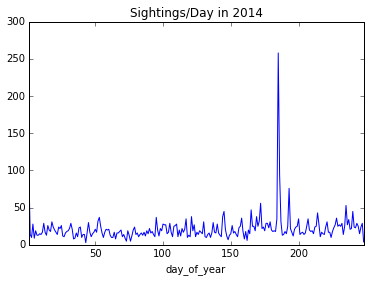

In [100]:
# 7. Plot number of sightings per day in 2014 (days should be in order!)

ufo["datetime"] = ufo.time.apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
ufo["year"] = ufo.datetime.apply(lambda x: x.year)
ufo["day_of_year"] = ufo.datetime.apply(lambda x: x.timetuple().tm_yday)
ufo[ufo["year"] == 2014].groupby("day_of_year").day_of_year.count().plot(title="Sightings/Day in 2014")

In [57]:
'''
Part 2: IRIS
'''

iris = pd.read_csv('../data/iris.csv')   # can also read csvs directly from the web!

# 1. Show the mean petal length by flower species

# 2. Show the mean sepal width by flower species

# 3. Use the groupby to show both #1 and #2 in one dataframe

# 4. Create a scatter plot plotting petal length against petal width
#    Use the color_flowers function to 

# 5. Show flowers with sepal length over 5 and petal length under 1.5

# 6. Show setosa flowers with petal width of exactly 0.2

# 7. Write a function to predict the species for each observation

def classify_iris(data):
    if False:
        return 'Iris-setosa'
    elif False:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'

# example use: 
# classify_iris([0,3,2.1,3.2]) == 'Iris-virginica'
# assume the order is the same as the dataframe, so:
# [sepal_length', 'sepal_width', 'petal_length', 'petal_width']


# make predictions and store as preds
preds = iris.drop('species', axis=1).apply(classify_iris, axis = 1)


preds


# test your function: compute accuracy of your prediction
(preds == iris['species']).sum() / float(iris.shape[0])

0.33333333333333331

In [10]:
'''
Part 3: FIFA GOALS
'''

goals = pd.read_csv('../data/fifa_goals.csv')


# 1. Some elements in the minute column have a  '+', remove it and cast each element as an int!

# 2. Show goals scored in the first 5 minutes of a game

# 3. Show goals scored after the regulation 90 minutes is over

# 4. Show the top scoring players

# 5. Show a histogram (distribution) of minutes with 20 bins

# 6. Show a histogram of the number of goals scored by players

